<a href="https://colab.research.google.com/github/larissaasaraiva/Projetos-Data-Analytics/blob/main/desafio_estatistica_squad_bertha_lutz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=purple size=10>Desafios de Estatística</font>
***

<font color=purple size=5>Squad Bertha Lutz</font>

<font color=purple size=5>Integrantes</font>
- Aleika Alves
- Barbara Ucelis
- Isabel Garcia
- Júlia Cristina
- Larissa Saraiva
- Maria Luiza
- Nathália Schmucler
- Roselyn Aranguren




# <font color=purple size=5>Importando todas as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import normaltest
from scipy.stats.contingency import chi2_contingency
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import datetime as dt
import pickle
from ipywidgets import widgets, HBox, VBox, Layout, RadioButtons 
from IPython.display import display, HTML

In [ ]:
#Retirando os warnings
import warnings
warnings.filterwarnings('ignore')

# 1. <font color=purple size=5>Frequências e Medidas - **Júlia Cristina**

## 1. Leia a base de dados e faça uma análise inicial, como por exemplo, verificar o tamanho da base de dados (quantidade de linhas e colunas) e o tipo das variáveis.

In [ ]:
# lendo a base de dados
import pandas as pd
dados = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
# tamanho da base
print(f'Nosso dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

Nosso dataset possui 1000 linhas e 8 colunas.


In [ ]:
# renomeando colunas
print(dados.columns)
dados.columns = ['gênero', 'raça/etnia', 'grau de escolaridade dos pais', 'tipo de almoço', 'fez curso preparatório', 'nota em matemática', 'nota em leitura', 'nota em escrita']
dados.head()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


,gênero,raça/etnia,grau de escolaridade dos pais,tipo de almoço,fez curso preparatório,nota em matemática,nota em leitura,nota em escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# mostrando valores únicos de cada coluna 
for i in dados:
    print(dados[i].name,dados[i].unique())

gênero ['female' 'male']
raça/etnia ['group B' 'group C' 'group A' 'group D' 'group E']
grau de escolaridade dos pais ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
tipo de almoço ['standard' 'free/reduced']
fez curso preparatório ['none' 'completed']
nota em matemática [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
nota em leitura [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
nota em escrita [ 74  88  9

In [ ]:
dados.describe()

,nota em matemática,nota em leitura,nota em escrita
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 2. Alguma variável precisa ser alterada ou criada? Faça as alterações se julgar necessária.

In [ ]:
# criando variável de média das notas 
dados['média das notas'] = (dados['nota em matemática'] + dados['nota em leitura'] + dados['nota em escrita']) / 3
dados['média das notas'] = round(dados['média das notas'],2)
dados.head()

,gênero,raça/etnia,grau de escolaridade dos pais,tipo de almoço,fez curso preparatório,nota em matemática,nota em leitura,nota em escrita,média das notas
0,feminino,group B,bachelor's degree,padrão,nenhum,72,72,74,72.67
1,feminino,group C,some college,padrão,concluído,69,90,88,82.33
2,feminino,group B,master's degree,padrão,nenhum,90,95,93,92.67
3,masculino,group A,associate's degree,gratuito/reduzido,nenhum,47,57,44,49.33
4,masculino,group C,some college,padrão,nenhum,76,78,75,76.33


In [ ]:
# traduzindo valores qualitativos 
dados['gênero'] = dados['gênero'].map({
    'female':'feminino',
    'male':'masculino'
})

# obs: não se traduziram as colunas "raça/etnia" e "grau de escolaridade dos pais" pois não há documentação especificando

dados['tipo de almoço'] = dados['tipo de almoço'].map({
    'standard':'padrão',
    'free/reduced':'gratuito/reduzido'
})

dados['fez curso preparatório'] = dados['fez curso preparatório'].map({
    'none':'nenhum',
    'completed':'concluído'
})

## 3. Verifique a quantidade de alunos em cada grupo racial/étnico.

In [ ]:
dados[['gênero','raça/etnia']].groupby(['raça/etnia']).count().reset_index()

,raça/etnia,gênero
0,group A,0
1,group B,0
2,group C,0
3,group D,0
4,group E,0


In [ ]:
dados['raça/etnia'].value_counts(normalize=True) * 100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: raça/etnia, dtype: float64

## 4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?

In [ ]:
dados['gênero'].value_counts()

Series([], Name: gênero, dtype: int64)

Conclusão: existem mais alunos do gênero feminino

## 5. Analise as notas de matemática dos alunos de forma mais completa possível.

In [ ]:
analise = pd.concat([matematica, leitura, escrita, media],axis=1)
analise = round(analise,2)
analise

,nota em matemática,nota em leitura,nota em escrita,média das notas
count,1000.00,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05,67.77
std,15.16,14.60,15.20,14.26
min,0.00,17.00,10.00,9.00
25%,57.00,59.00,57.75,58.33
50%,66.00,70.00,69.00,68.33
75%,77.00,79.00,79.00,77.67
max,100.00,100.00,100.00,100.00


### matematica

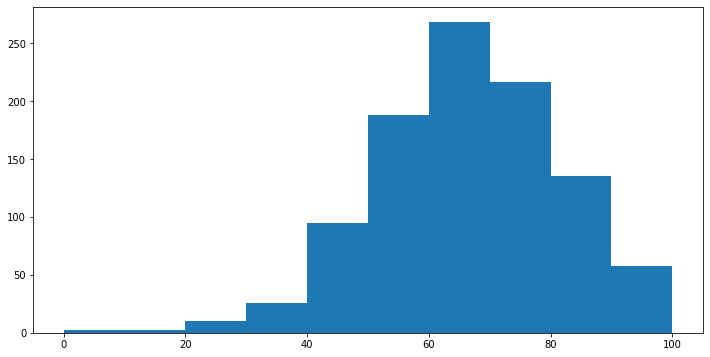

In [ ]:
mtm = dados['nota em matemática']
mtm.hist(grid=False,figsize=(12,6));

In [ ]:
# comparando média, mediana e moda (sendo próximas, pode-se considerar uma distribuição normal)
print(mtm.mean())
print(mtm.median())
print(mtm.mode()[0])

66.089
66.0
65


In [ ]:
tabela_frequencias = pd.value_counts(
    pd.cut( x = mtm, bins = 5, include_lowest = True, right=False),
    sort = False )
tabela_frequencias = pd.DataFrame(tabela_frequencias)
tabela_frequencias.reset_index(drop=True,inplace=True)
tabela_frequencias.rename(index={0:'0 - 19',
             1:'20 - 39',
             2:'40 - 59',
             3:'60 - 79',
             4:'80 - 100'}, inplace=True)
tabela_frequencias.reset_index(inplace=True)
tabela_frequencias.rename(columns={'nota em matemática':'frequência absoluta','index':'nota em matemática'},inplace=True)
tabela_frequencias

,nota em matemática,frequência absoluta
0,0 - 19,4
1,20 - 39,36
2,40 - 59,283
3,60 - 79,484
4,80 - 100,193


Conclusão de matemática:
- Pode-se considerar que a distribuição das notas de matemática segue uma distribuição normal
- É a única disciplina que registrou como nota mínima um zero
- Registrou o pior desempenho em comparação com as outras, com a menor média de todas
- As notas se concentraram no intervalo entre 60 e 79, sendo 65 a nota mais repetida

## Análises gráficas

### Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?

In [ ]:
mtm_escolaridade = dados[['grau de escolaridade dos pais','nota em matemática']].groupby(['grau de escolaridade dos pais']).mean()
mtm_escolaridade.reset_index(inplace=True)
mtm_escolaridade

,grau de escolaridade dos pais,nota em matemática
0,associate's degree,67.882883
1,bachelor's degree,69.389831
2,high school,62.137755
3,master's degree,69.745763
4,some college,67.128319
5,some high school,63.497207


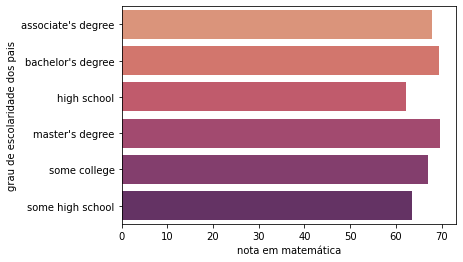

In [ ]:
import seaborn as sns
sns.barplot(data=mtm_escolaridade, y='grau de escolaridade dos pais', x='nota em matemática',orient='h',palette='flare');

### Faça a mesma análise para as notas de leitura e escrita.

In [ ]:
leitura_escolaridade = dados[['grau de escolaridade dos pais','nota em leitura']].groupby(['grau de escolaridade dos pais']).mean()
leitura_escolaridade.reset_index(inplace=True)

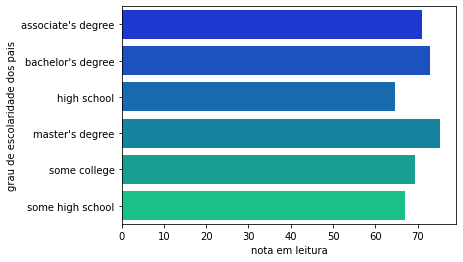

In [ ]:
sns.barplot(data=leitura_escolaridade, y='grau de escolaridade dos pais', x='nota em leitura',orient='h',palette='winter');

In [ ]:
escrita_escolaridade = dados[['grau de escolaridade dos pais','nota em escrita']].groupby(['grau de escolaridade dos pais']).mean()
escrita_escolaridade.reset_index(inplace=True)

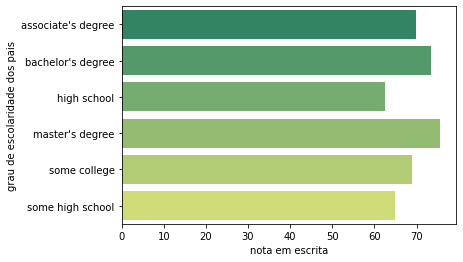

In [ ]:
sns.barplot(data=escrita_escolaridade, y='grau de escolaridade dos pais', x='nota em escrita',orient='h',palette='summer');

### Verifique graficamente a relação da nota de leitura e de escrita.

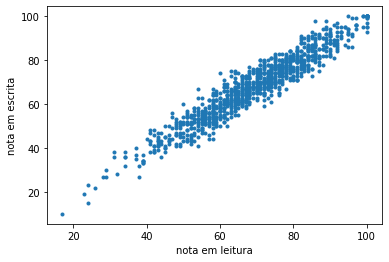

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=dados['nota em leitura'], y=dados['nota em escrita'],marker='.')
plt.xlabel('nota em leitura')
plt.ylabel('nota em escrita')
plt.show()

# 2. <font color=purple size=5>Challenge Probabilidade e Amostragem - **Maria Luiza**
- Desafio 1: Entendendo o consumidor 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
dados = pd.read_csv('/content/drive/My Drive/Bases/desafio01consumidor-230209-164413.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


**Questão 1**

Entenda a distribuição de variáveis como de idade / renda / regiao /
produtos mais comprados antes e depois da pandemia

A idade possui uma distribuição normal?

<Axes: title={'center': 'Distribuição de idade'}, ylabel='Frequency'>

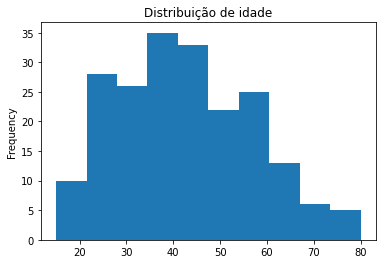

In [ ]:
dados.idade.plot.hist(title='Distribuição de idade')

Através da plotagem do gráfico acima é possível afirmar que a variável **idade** possui uma distribuição aproximadamente normal. 


**Houve uma mudança na idade dos consumidores antes e depois da pandemia?**


<Axes: title={'center': 'idade'}, xlabel='[pre-pandemia]'>

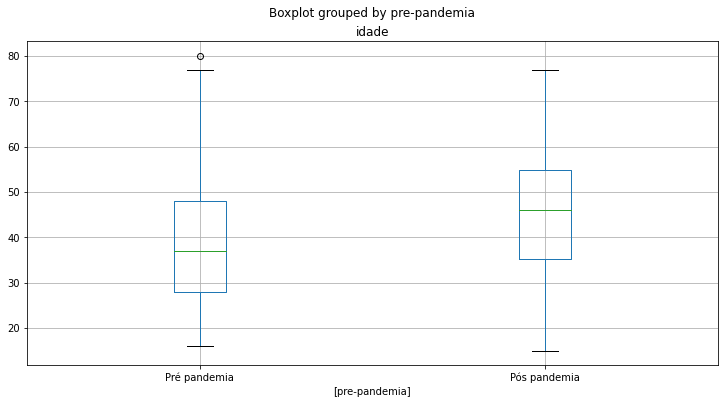

In [ ]:
dados['pre-pandemia'].replace({0: 'Pós pandemia', 1: 'Pré pandemia'}, inplace=True)
dados.boxplot(column=['idade'], by=['pre-pandemia'], figsize=(12,6))


O boxplot acima mostra que houve uma mudança na distribuição de idades dos consumidos comparando os períodos antes e depois da pandemia. Na pré-pandemia os consumidores tendiam a ser mais jovens que os consumidores pós-pandemia.

**A renda segue uma distribuição normal?**

<Axes: title={'center': 'Distribuição de renda'}, ylabel='Frequency'>

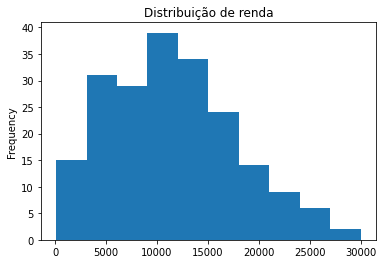

In [ ]:
dados.renda.plot.hist(title='Distribuição de renda')

O histograma e o boxplot mostram que a variável **renda** segue uma distribuição aproximadamente normal.

**Houve uma mudança na renda dos consumidores antes e depois da pandemia?**

<Axes: title={'center': 'renda'}, xlabel='[pre-pandemia]'>

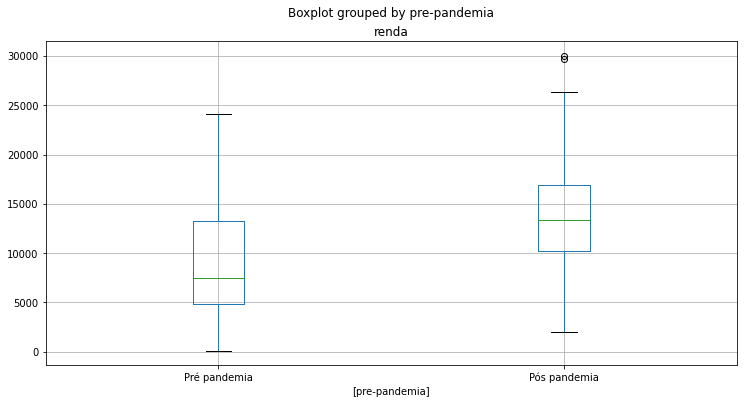

In [ ]:
dados.boxplot(column=['renda'], by=['pre-pandemia'], figsize=(12,6))

Analisando o gráfico acima, nota-se que a renda dos consumidores tendia a ser maior no período pós-pandemia.

**Análise das variáveis qualitativas nominais (produto e região)**


In [ ]:
regiao = dados.groupby(['regiao-BR', 'pre-pandemia'])['id_cliente'].count().reset_index()
regiao

,regiao-BR,pre-pandemia,id_cliente
0,Centro-Oeste,Pré pandemia,17
1,Centro-Oeste,Pós pandemia,8
2,Nordeste,Pré pandemia,26
3,Nordeste,Pós pandemia,25
4,Norte,Pré pandemia,8
5,Norte,Pós pandemia,9
6,Sudeste,Pré pandemia,21
7,Sudeste,Pós pandemia,18
8,Sul,Pré pandemia,29
9,Sul,Pós pandemia,42


Text(0, 0.5, 'Total de consumidores')

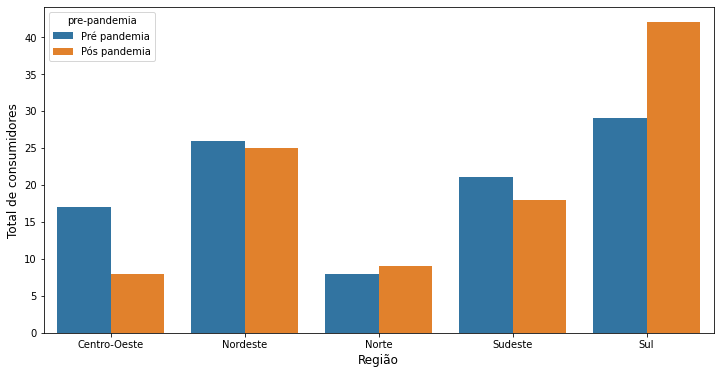

In [ ]:
ax = sns.barplot(data=regiao, x="regiao-BR", y="id_cliente", hue="pre-pandemia")
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Região', fontsize=12)
ax.set_ylabel('Total de consumidores', fontsize=12)

O gráfico mostra que a quantidade de clientes nas regiões 'Centro-Oeste' e 'Sul' apresentaram uma grande variação entre os períodos pré e pós pandemia. Enquanto que as outras regiões apresentam variações menores.

**Produtos**

In [ ]:
produtos = dados.groupby(['produto', 'pre-pandemia'])['id_cliente'].count().reset_index()
produtos

,produto,pre-pandemia,id_cliente
0,antissinais,0,20
1,antissinais,1,9
2,base,0,4
3,base,1,3
4,batom,0,15
5,batom,1,61
6,desodorante,0,46
7,desodorante,1,20
8,perfume,0,8
9,perfume,1,4


Text(0, 0.5, 'Total de consumidores')

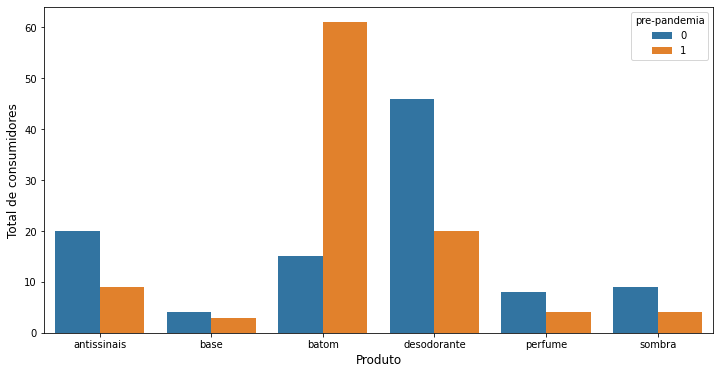

In [ ]:
ax = sns.barplot(data=produtos, x="produto", y="id_cliente", hue="pre-pandemia")
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Produto', fontsize=12)
ax.set_ylabel('Total de consumidores', fontsize=12)

Dois produtos `batom` e `desodorante` se destacam devido a alta variação em comparação com os períodos pré e pós pandemia. A venda batom diminuiu significativamente no pós pandemia, enquanto que o desodorante aumentou suas vendas, também no período pós pandemia.

**Questão 2**

Você notou diferenças nítidas pré e pós pandemia? Como você poderia
provar estatisticamente que essas diferenças são significativas ? (pergunta
extra)

Testando as hipóteses

H0: Aṕos a pandemia a distribuição dos produtos permaneceu igual

H1: Aṕos a pandemia a distribuição dos produtos mudou

In [ ]:
prod_h = pd.crosstab(dados['produto'],dados['pre-pandemia'])

In [ ]:
chi,p_valor,_,_ = chi2_contingency(prod_h)
print("Chi: {}".format(chi))
print("P valor: {}".format(p_valor))

Chi: 45.65239241535489
P valor: 1.068901907328467e-08


In [ ]:
confianca = 0.95
significancia = 1 - confianca

In [ ]:
if(p_valor >= significancia):
  print('Aceita H0 e rejeita H1, logo, após a pandemia a distribuição dos produtos permaneceu igual')
else:
  print('Aceita H1 e rejeita H0, logo, após a pandemia a distribuição dos produtos mudou ')

Aceita H1 e rejeita H0, logo, após a pandemia a distribuição dos produtos mudou 


**Questão 3**

Suponha agora que os dados recebidos são somente uma amostra da sua
população total de clientes. Suponha que a sua "população" de clientes
verdadeira é de 100000. Qual o tamanho da amostra necessária para
chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A
base informada é suficiente? E com uma margem de erro de 10%?

In [ ]:
confianca = 0.95
significancia = 1 - confianca
e_percentual = 0.02

media_amostra = dados.renda.mean()
desvio_padrao_amostra = dados.renda.std()
e = media_amostra * e_percentual

probabilidade = 0.5 + confianca/2

z = norm.ppf(probabilidade)

n = (z * (desvio_padrao_amostra / e)) ** 2
n.round()

2829.0

Para uma margem de erro de 2% e nível de confiança de 95% é necessária uma amostra com cerca de 2.829 de tamanho. Logo, a amostra disponível não é suficiente para atender aos critérios informados, já que ela tem apenas 203 registros.

In [ ]:
confianca = 0.95
significancia = 1 - confianca
e_percentual = 0.1

media_amostra = dados.renda.mean()
desvio_padrao_amostra = dados.renda.std()
e = media_amostra * e_percentual

probabilidade = 0.5 + confianca/2

z = norm.ppf(probabilidade)

n = (z * (desvio_padrao_amostra / e)) ** 2
n.round()

113.0

Para uma margem de erro de 10% e nível de confiança de 95% é necessária uma amostra com cerca de 113 de tamanho. Para esses critérios é possui utilizar a base informada.

# 3. <font color=purple size=5>Challenge Probabilidade e Amostragem - **Isabel Garcia**
- Desafio 2: Determinando o Estoque de Segurança 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
estoque_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/desafio_02_estoque-230209-164413.csv')

In [ ]:
estoque_df.head()

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


#### 1. Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?

In [ ]:
estoque_df['data'] = pd.to_datetime(estoque_df['data'])

In [ ]:
print(f"O período de vendas analisado vai de {estoque_df['data'].min()} à {estoque_df['data'].max()}")

In [ ]:
estoque_df.describe().round(2)

,vendas-iogurte,lead-time
count,370.00,370.00
mean,4999.17,5.09
std,77.29,1.58
min,4811.00,1.00
25%,4947.00,4.00
50%,4996.00,5.00
75%,5054.00,6.00
max,5233.00,9.00


Vendas:

<Axes: >

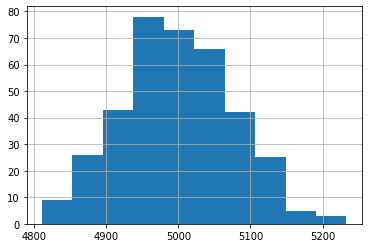

In [ ]:
estoque_df['vendas-iogurte'].hist()

In [ ]:
mediana = statistics.median(estoque_df['vendas-iogurte'])
print("Mediana: ", mediana)

media = estoque_df['vendas-iogurte'].mean()
print("Média: ", media)

moda = statistics.mode(estoque_df['vendas-iogurte'])
print("Moda:",moda)

Mediana:  4996.0
Média:  4999.1702702702705
Moda: 5020


Lead-time:

<Axes: >

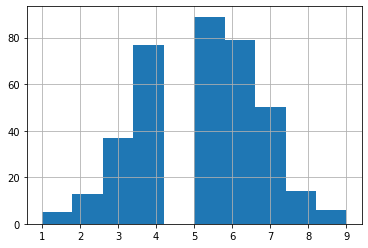

In [ ]:
estoque_df['lead-time'].hist()

In [ ]:
mediana = statistics.median(estoque_df['lead-time'])
print("Mediana: ", mediana)

media = estoque_df['lead-time'].mean()
print("Média: ", media.round(2))

moda = statistics.mode(estoque_df['lead-time'])
print("Moda: ",moda)

Mediana:  5.0
Média:  5.09
Moda:  5


Resposta: Os dados seguem uma distribuição mais ou menos normal, visto que são mais ou menos simétricos em torno da média, seguindo uma curvatura de sino. Além disto, média, moda e mediana assumem valores similares para os dados analisados.

#### 2. Assuma que:
* a. Os dados seguem uma distribuição normal.
* b. O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%
* c. O produto não tem sazonalidade (todos os meses vende valores
próximos) e a demanda média passada é uma boa estimativa para a
projetada, de acordo com o time de planejamento de demanda.
#####Calcule, com os dados fornecidos, o estoque de segurança desejado.

In [ ]:
t = estoque_df['lead-time'].mean()
t

5.094594594594595

In [ ]:
nivel_servico = 0.9987
z = norm.ppf(nivel_servico)
z

3.0

In [ ]:
sigma = estoque_df['vendas-iogurte'].std()
sigma

77.28506821873455

In [ ]:
estoque_de_seguranca = z*(((sigma**2)*t)**(1/2))
print(f"O estoque de segurança adequado é de : {estoque_de_seguranca.round(2)} produtos")

O estoque de segurança adequado é de : 523.33 produtos


# 4. <font color=purple size=5>Teste de hipótese - **Roselyn**
- Desafio 1: Cosméticos 

**Análise do Dataset**

In [ ]:
#Lendo o dataset do desafio
dados_cosmeticos = pd.read_csv('desafio_01_cosmeticos.csv')
dados_cosmeticos

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1
...,...,...,...,...,...
295,3,296,18,52,0
296,3,297,30,19,0
297,3,298,43,23,1
298,3,299,41,19,0


In [ ]:
dados_cosmeticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id_produto     300 non-null    int64
 1   id_voluntária  300 non-null    int64
 2   durabilidade   300 non-null    int64
 3   idade          300 non-null    int64
 4   exposicao_sol  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB


In [ ]:
dados_cosmeticos.describe()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.000000,150.500000,17.133333,36.886667,0.440000
std,0.817861,86.746758,10.942945,12.625841,0.497216
min,1.000000,1.000000,5.000000,18.000000,0.000000
25%,1.000000,75.750000,9.000000,26.000000,0.000000
50%,2.000000,150.500000,14.000000,36.000000,0.000000
75%,3.000000,225.250000,20.000000,48.000000,1.000000
max,3.000000,300.000000,48.000000,60.000000,1.000000


1 - Existe diferenca estatisticamente significativa na durabilidade dos batons com formulas diferentes?

---

**Durabilidade - Hipóteses:**

1.   Hipótese Nula (H0) — Não há diferença significativa entre a durabilidade dos batons entre as tres formulas. (Distribuição normal)
2.   Hipótese Alternativa (H1) — Há diferença significativa entre a durabilidade dos batons entre as tres formulas.

**Calculo de p_valor.**

In [ ]:
#Assumindo distribuição normal e considerando um nível de significancia de 5%
stat_test,p_valor = normaltest(dados_cosmeticos.durabilidade)
significancia = 0.05

In [ ]:
if p_valor <= significancia:
  print(f" Valor de p é igual a {p_valor}.\n Portanto, a Hipótese Nula é rejeitada e há evidência estatística para afirmar que há diferença significativa entre a durabilidade dos batons entre as tres formulas.")
else:
  print(f" Valor de p é igual a {p_valor},\n Portanto, não podemos rejeitar a Hipótese Nula e não há evidência estatística para afirmar que há diferença entre a durabilidade dos batons entre as tres formulas.")

 Valor de p é igual a 3.5086764057237255e-13.
 Portanto, a Hipótese Nula é rejeitada e há evidência estatística para afirmar que há diferença significativa entre a durabilidade dos batons entre as tres formulas.


**Análise gráfica**

Text(0.5, 0, 'Formula')

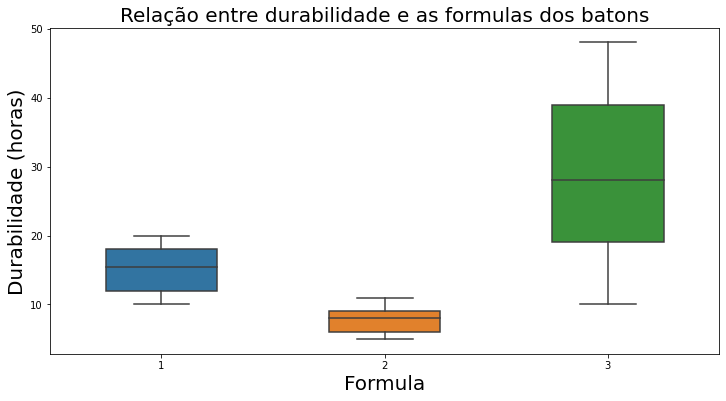

In [ ]:
ax_dur_id = sns.boxplot(y='durabilidade', x='id_produto', data=dados_cosmeticos, orient = 'v', width=0.5)
ax_dur_id.figure.set_size_inches(12,6)
ax_dur_id.set_title('Relação entre durabilidade e as formulas dos batons', fontsize=20)
ax_dur_id.set_ylabel('Durabilidade (horas)', fontsize=20)
ax_dur_id.set_xlabel('Formula', fontsize=20)

O gráfico de acima mostra que há uma diferença na durabilidade das diferentes formulas dos batons, tendo a maior durabilidade o baton 3 e a menor durabilidade o baton 2.

2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com relacão a idade?

---

**Exposição ao sol - Hipóteses:**


1.   Hipótese Nula (H0) — Não persiste a diferença na durabilidade quando a voluntária se expoe ao sol.
2.   Hipótese Alternativa (H1) — Persiste a diferença na durabilidade quando a voluntária se expoe ao sol.

**Análise descritiva e gráfica**

*Com exposição ao sol*

In [ ]:
com_sol = dados_cosmeticos.query('exposicao_sol == 1')

In [ ]:
com_sol.shape

(132, 5)

In [ ]:
com_sol = dados_cosmeticos.query('exposicao_sol == 1').sample(n = 132 , random_state = 101).durabilidade

In [ ]:
media_com_sol = com_sol.mean()
media_com_sol

12.75

In [ ]:
desvio_com_sol = com_sol.std()
desvio_com_sol

6.999863684605111

*Sem exposição ao sol*

In [ ]:
sem_sol = dados_cosmeticos.query('exposicao_sol == 0')

In [ ]:
sem_sol.shape

(168, 5)

In [ ]:
sem_sol = dados_cosmeticos.query('exposicao_sol == 0').sample(n = 168 , random_state = 101).durabilidade

In [ ]:
media_sem_sol  = sem_sol.mean()
media_sem_sol

20.577380952380953

In [ ]:
desvio_sem_sol = sem_sol.std()
desvio_sem_sol

12.200175233751594

In [ ]:
#Assumindo uma significancia de 1%
significancia = 0.01
confianca = 1 - significancia
n_com_sol = 132
n_sem_sol = 168
D_0 = 0

In [ ]:
#Definição das áreas de aceitação e de rejeição de H0
probabilidade = confianca
probabilidade

0.99

In [ ]:
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

2.33

In [ ]:
#Teste Z
numerador = (media_sem_sol - media_com_sol) - D_0
denominador = np.sqrt((desvio_sem_sol**2 / n_sem_sol) + (desvio_com_sol**2 / n_com_sol))
z = numerador/denominador
print(z)

6.981014136853921


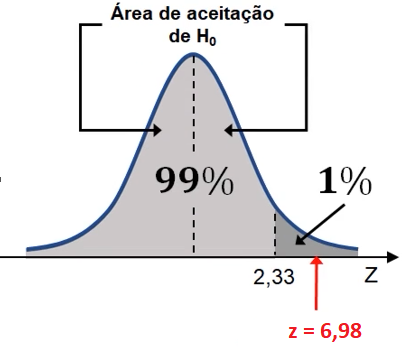

A hipótese nula é rejeitada com motivo de que o valor de z ficou fora da área de aceitação do grafico. 

Portanto, persiste a diferença na durabilidade quando a voluntária se expoe ao sol.
 

Text(0.5, 0, 'Exposição ao sol')

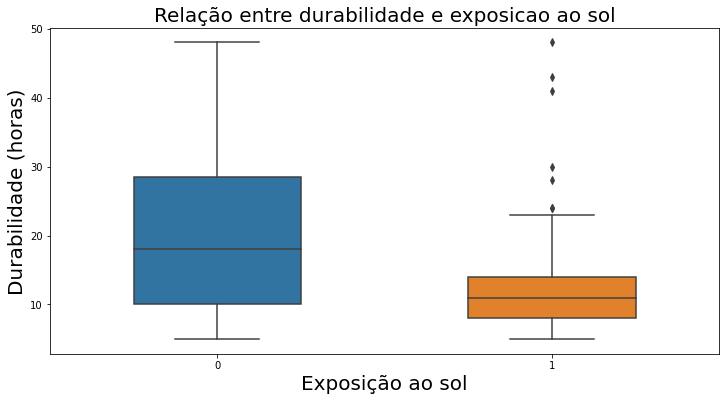

In [ ]:
ax_dur_sol = sns.boxplot(y='durabilidade', x='exposicao_sol', data=dados_cosmeticos, orient = 'v', width=0.5)
ax_dur_sol.figure.set_size_inches(12,6)
ax_dur_sol.set_title('Relação entre durabilidade e exposicao ao sol', fontsize=20)
ax_dur_sol.set_ylabel('Durabilidade (horas)', fontsize=20)
ax_dur_sol.set_xlabel('Exposição ao sol', fontsize=20)

O gráfico de acima também mostra que há uma diminuição da durabilidade proporcional a exposição ao sol dos batons. Reforçando a hipótese, de que há diferença significativa na durabilidade quando a voluntária se expoe ao sol.

**Idade - Hipóteses:**


1.   Hipótese Nula (H0) — Não há diferença na durabilidade a respeito da idade da voluntária. Então, a durabilidade do baton para uma voluntária com a menor idade é igual a durabilidade da voluntária com a maior idade.
2.   Hipótese Alternativa (H1) — Há diferença na durabilidade a respeito da idade da voluntária. Então, a durabilidade do baton para uma voluntária com a menor idade é diferente a durabilidade da voluntária com a maior idade.

**Análise descritiva e gráfica**

*Idade mínima  (18 anos)*

In [ ]:
idade_min = dados_cosmeticos.query('idade == 18')

In [ ]:
idade_min.shape

(6, 5)

In [ ]:
idade_min = dados_cosmeticos.query('idade == 18').sample(n = 6 , random_state = 101).durabilidade

In [ ]:
media_idade_min = idade_min.mean()
media_idade_min

15.5

In [ ]:
desvio_idade_min = idade_min.std()
desvio_idade_min

15.9968746947646

*Idade máxima (60 anos)*

In [ ]:
idade_max = dados_cosmeticos.query('idade == 60')

In [ ]:
idade_max.shape

(7, 5)

In [ ]:
idade_max = dados_cosmeticos.query('idade == 60').sample(n = 7 , random_state = 101).durabilidade

In [ ]:
media_idade_max = idade_max.mean()
media_idade_max

12.0

In [ ]:
desvio_idade_max = idade_max.std()
desvio_idade_max

3.366501646120693

In [ ]:
#Assumindo uma significancia de 1%
significancia = 0.01
confianca = 1 - significancia
n_idade_min = 165
n_idade_max = 135
D_0 = 0

In [ ]:
#Definição das áreas de aceitação e de rejeição de H0
probabilidade = confianca
probabilidade

0.99

In [ ]:
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

2.33

In [ ]:
#Teste Z
numerador = (media_idade_min - media_idade_max) - D_0
denominador = np.sqrt((desvio_idade_min**2 / n_idade_min) + (desvio_idade_max**2 / n_idade_max))
z = numerador/denominador
print(z)

2.7373340460424713


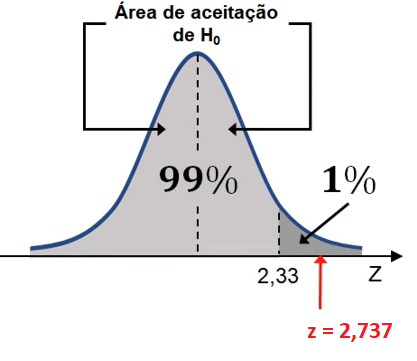

A hipótese nula é rejeitada com motivo de que o valor de z ficou fora da área de aceitação. 

Portanto, há diferença significativa na durabilidade a respeito da idade da voluntária.

Text(0.5, 0, 'idade')

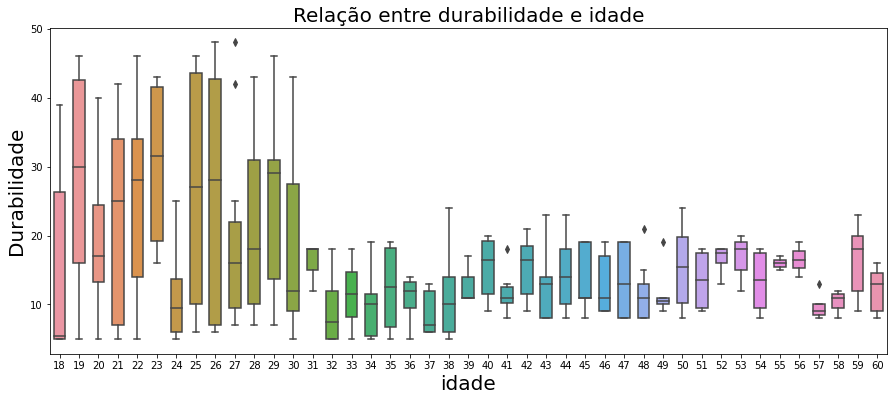

In [ ]:
ax_dur_id = sns.boxplot(y='durabilidade', x='idade', data=dados_cosmeticos, orient = 'v', width=0.6)
ax_dur_id.figure.set_size_inches(15,6)
ax_dur_id.set_title('Relação entre durabilidade e idade', fontsize=20)
ax_dur_id.set_ylabel('Durabilidade', fontsize=20)
ax_dur_id.set_xlabel('Idade', fontsize=20)

O gráfico de acima também mostra que há uma diminuição da durabilidade a medida que a idade aumenta. Reforçando a hipótese, de que há diferença significativa na durabilidade a respeito da idade da voluntária.

3 - Qual fórmula de batom voce indicaria para consumidores que buscam maior durabilidade e exposicao ao sol?

---

**Formula - Hipóteses:**


1.   Hipótese Nula (H0) — Não há diferença na durabilidade e exposição ao sol das formulas 1, 2 e 3.
2.   Hipótese Alternativa (H1) — Há diferença na durabilidade e exposição ao sol das formulas 1, 2 e 3.

**Análise dos dados**

1.   Variavel dependente quantitativa: durabilidade (horas) 
2.   Variavel independente qualitativa: id_produto
3. Variavel independente qualitativa: exposicao_sol


In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=b105c4a0c9faa2a92f1064426b0a32e3f811210ceb303ccd7500efde47ef2b2c
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [ ]:
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
dados_cosmeticos = dados_cosmeticos.drop(['id_voluntária', 'idade'], axis=1)

In [ ]:
dados_cosmeticos.head()

,id_produto,durabilidade,exposicao_sol
0,1,12,1
1,2,5,0
2,1,19,0
3,1,14,1
4,1,17,1


**Análise descritiva e gráfica**

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


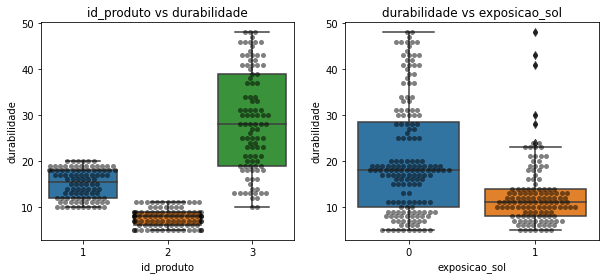

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title('id_produto vs durabilidade')
sns.boxplot(x="id_produto", y="durabilidade", data=dados_cosmeticos, ax=axs[0])
sns.swarmplot(x="id_produto", y="durabilidade", data=dados_cosmeticos, color='black',
              alpha = 0.5, ax=axs[0])
axs[1].set_title('durabilidade vs exposicao_sol')
sns.boxplot(x="exposicao_sol", y="durabilidade", data=dados_cosmeticos, ax=axs[1])
sns.swarmplot(x="exposicao_sol", y="durabilidade", data=dados_cosmeticos, color='black',
              alpha = 0.5, ax=axs[1]);

In [ ]:
print('durabilidade média e desviação padrão por exposicao_sol')
dados_cosmeticos.groupby('exposicao_sol')['durabilidade'].agg(['mean', 'std'])

durabilidade média e desviação padrão por exposicao_sol


,mean,std
exposicao_sol,,
0,20.577381,12.200175
1,12.750000,6.999864


In [ ]:
print('durabilidade média e desviação padrão por id_produto')
dados_cosmeticos.groupby('id_produto')['durabilidade'].agg(['mean', 'std'])

durabilidade média e desviação padrão por id_produto


,mean,std
id_produto,,
1,15.11,3.284168
2,7.77,1.942897
3,28.52,11.110537


In [ ]:
print('durabilidade média e desviação padrão por exposicao_sol e id_produto')
dados_cosmeticos.groupby(['exposicao_sol', 'id_produto'])['durabilidade'].agg(['mean', 'std'])

durabilidade média e desviação padrão por exposicao_sol e id_produto


mean       std
exposicao_sol id_produto                     
0             1           17.727273  1.496348
              2            7.961538  2.057617
              3           33.901639  9.098910
1             1           11.911111  1.578581
              2            7.562500  1.809035
              3           20.102564  8.466015

Da representação gráfica e do cálculo das médias, pode-se intuir que existe uma diferença na durabilidade  em função da exposição ao sol.

A durabilidade parece ser maior na formula 3.

A priori, parece que as condições necessárias para uma ANOVA estão satisfeitas.

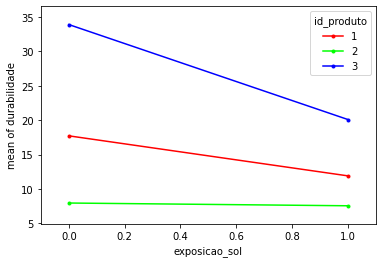

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = dados_cosmeticos.exposicao_sol,
    trace    = dados_cosmeticos.id_produto,
    response = dados_cosmeticos.durabilidade,
    ax       = ax,
)

O gráfico de interação acima parece indicar que a durabilidade entre os tres tipos de formula é inversamente proporcional a exposição ao sol.

In [ ]:
# Teste ANOVA (Two-way)
pg.anova(
    data     = dados_cosmeticos,
    dv       = 'durabilidade',
    between  = ['exposicao_sol', 'id_produto'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,exposicao_sol,3163.3632,1.0,3163.3632,112.1694,0.0,0.2762
1,id_produto,20776.6473,2.0,10388.3236,368.3586,0.0,0.7148
2,exposicao_sol * id_produto,2207.8081,2.0,1103.9040,39.1432,0.0,0.2103
3,Residual,8291.2887,294.0,28.2017,NaN,NaN,NaN


Como o valor de p (p-unc) é menor que 0,05; há evidência suficiente para dizer que os valores médios em cada grupo não são iguais. Portanto, a hipótese nula é rejeitada. 

Também é possível observar pelo tamanho do efeito (np2), o grande efeito que possui o id_produto, ou seja as diferentes formulas sobre a durabilidade dos batons. 

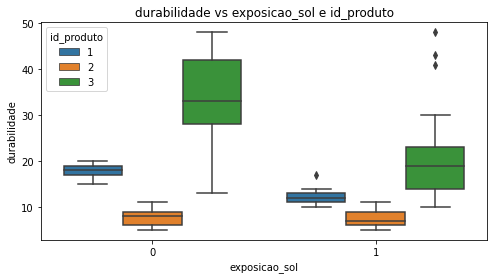

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('durabilidade vs exposicao_sol e id_produto')
sns.boxplot(x="exposicao_sol", y="durabilidade", hue='id_produto', data=dados_cosmeticos, ax=ax);

O gráfico acima indica que, a formula 3 do baton possui maior durabilidade tanto em voluntárias que tiveram exposição ao sol, como as que não tiveram. Nesse sentido, seria essa formula a que a equipe indicaria.

# 5. <font color=purple size=5>Teste de hipótese - **Larissa**
- Desafio 2

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
# gerado 45 amostras com a media e o desvio padrão
amostra1 = np.random.normal(11.52, 3.32, 45)

In [ ]:
# usando ttest_1samp para termos a diferença estatistica e o p-value
result = stats.ttest_1samp(amostra1, 7.85)
# ponto 1
print("relevancia da diferença de preços:",result.statistic)
# z-value do ponto 2
print("p-value:",result.pvalue)

relevancia da diferença de preços: 8.68053794991829
p-value: 4.344950873100687e-11


In [ ]:
# conseguindo o intervalo de confiança a partir do resultado do ttest_1samp
low , high = result.confidence_interval(0.95)


#intervalo de confiança do ponto 2
print("o intervalo de confiança esta entre:")
print(low)
print("e:")
print(high)

o intervalo de confiança esta entre:
10.99966377076388
e:
12.904410343715595


# 6. <font color=purple size=5>Desafio Análise de Correlação - **Barbara**

In [ ]:
dados = pd.read_csv('desafio_01_preco_imoveis-230209-164627.csv')
dados.shape

(21613, 19)

In [ ]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

6.1 - Análise da correlação de todas as variáveis com o preço do imóvel.

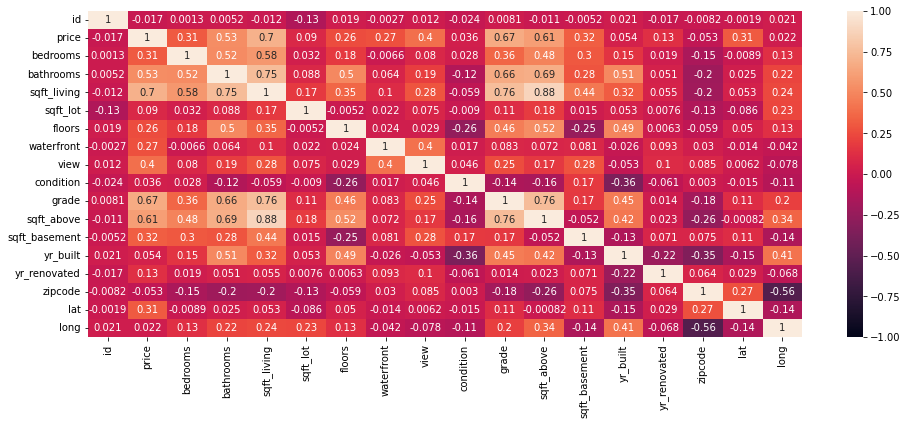

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dados.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
dados.corr().round(4)['price'].sort_values(ascending=False)

price            1.0000
sqft_living      0.7020
grade            0.6674
sqft_above       0.6056
bathrooms        0.5251
view             0.3973
sqft_basement    0.3238
bedrooms         0.3083
lat              0.3070
waterfront       0.2664
floors           0.2568
yr_renovated     0.1264
sqft_lot         0.0897
yr_built         0.0540
condition        0.0364
long             0.0216
id              -0.0168
zipcode         -0.0532
Name: price, dtype: float64

As **variáveis mais correlacionadas com o preço** são:
- sqft_living (tamanho do imóvel);
- grade (nota do imóvel); 
- sqft_above (tamanho da casa acima do solo);
- bathrooms (número de banheiros);
- view (o número de quartos com vista). 

As **variáveis menos correlacionadas com o preço** são: 
- id (código identificador do imóvel);
- long (longitude do imóvel);
- condition (condição do imóvel);
- zipcode (CEP);
- yr_built (ano que o imóvel foi construído).

6.2 - Análise das top 5 variáveis mais correlacionadas com o preço

6.2.1 - Distribuições das top 5 variáveis mais correlacionadas com o preço

HISTOGRAMAS

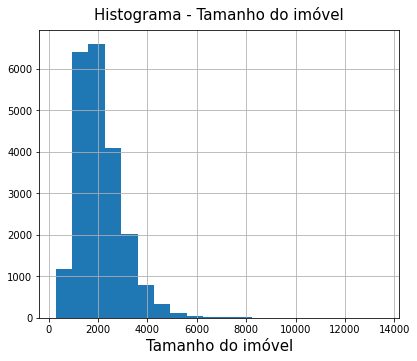

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(dados['sqft_living'], bins=20)
eixo.set_title('Histograma - Tamanho do imóvel', fontsize=15, pad=10)
eixo.set_xlabel('Tamanho do imóvel', fontsize=15)
eixo.grid(True)

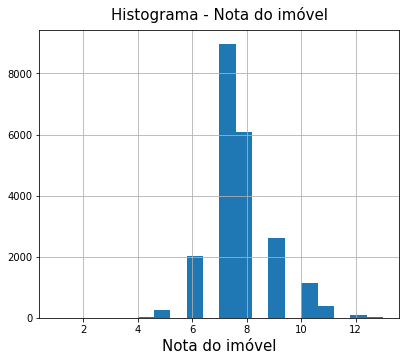

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(dados['grade'], bins=20)
eixo.set_title('Histograma - Nota do imóvel', fontsize=15, pad=10)
eixo.set_xlabel('Nota do imóvel', fontsize=15)
eixo.grid(True)

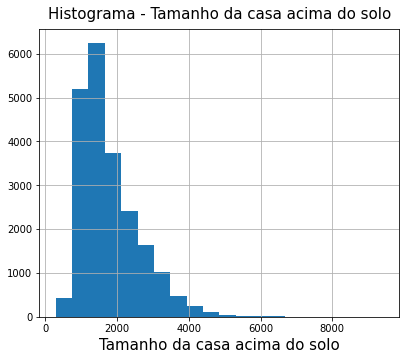

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(dados['sqft_above'], bins=20)
eixo.set_title('Histograma - Tamanho da casa acima do solo', fontsize=15, pad=10)
eixo.set_xlabel('Tamanho da casa acima do solo', fontsize=15)
eixo.grid(True)

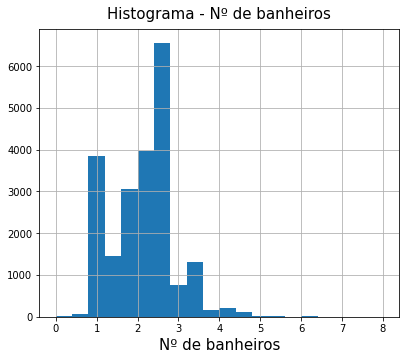

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(dados['bathrooms'], bins=20)
eixo.set_title('Histograma - Nº de banheiros', fontsize=15, pad=10)
eixo.set_xlabel('Nº de banheiros', fontsize=15)
eixo.grid(True)

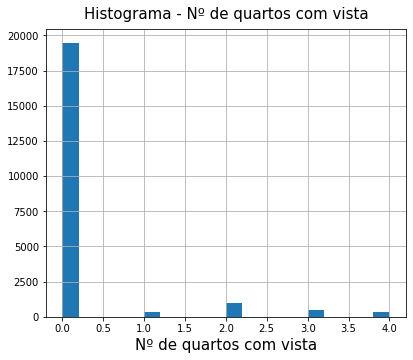

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(dados['view'], bins=20)
eixo.set_title('Histograma - Nº de quartos com vista', fontsize=15, pad=10)
eixo.set_xlabel('Nº de quartos com vista', fontsize=15)
eixo.grid(True)

BOXPLOTS

<Axes: title={'center': 'Box plot - Tamanho do imóvel'}, xlabel='Tamanho do imóvel'>

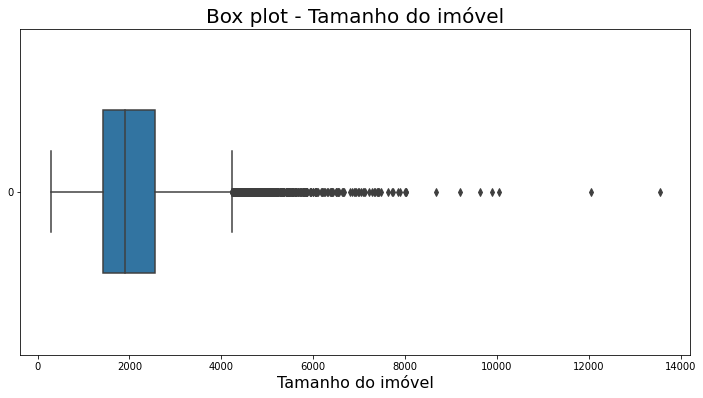

In [ ]:
ax_tamanho_do_imovel = sns.boxplot(data= dados['sqft_living'], orient='h', width=0.5)
ax_tamanho_do_imovel.figure.set_size_inches(12, 6)
ax_tamanho_do_imovel.set_title('Box plot - Tamanho do imóvel', fontsize=20)
ax_tamanho_do_imovel.set_xlabel('Tamanho do imóvel', fontsize=16)
ax_tamanho_do_imovel

<Axes: title={'center': 'Box plot - Nota do imóvel'}, xlabel='Nota do imóvel'>

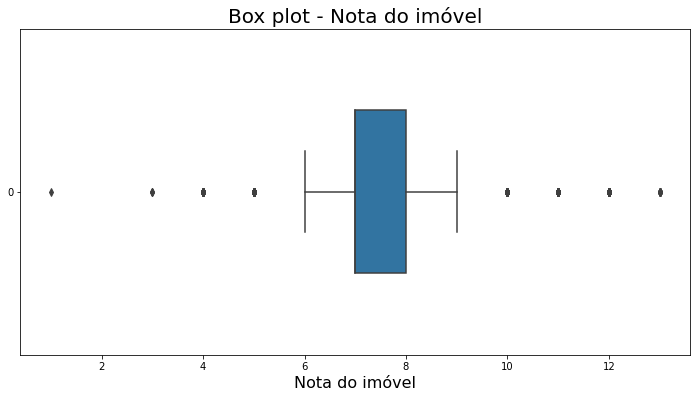

In [ ]:
ax_nota_do_imovel = sns.boxplot(data= dados['grade'], orient='h', width=0.5)
ax_nota_do_imovel.figure.set_size_inches(12, 6)
ax_nota_do_imovel.set_title('Box plot - Nota do imóvel', fontsize=20)
ax_nota_do_imovel.set_xlabel('Nota do imóvel', fontsize=16)
ax_nota_do_imovel

<Axes: title={'center': 'Box plot - Tamanho da casa acima do solo'}, xlabel='Tamanho da casa acima do solo'>

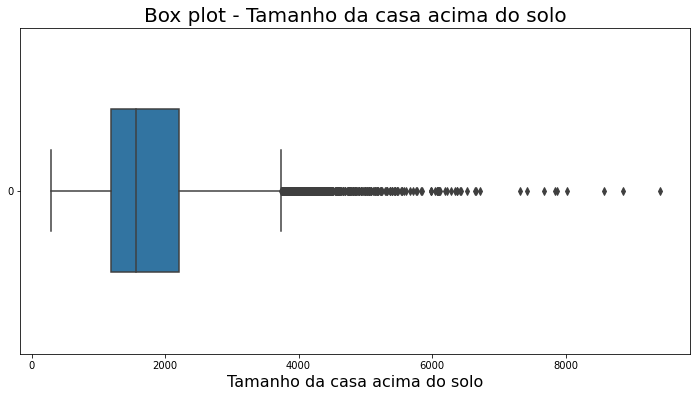

In [ ]:
ax_tamanho_acima_solo = sns.boxplot(data= dados['sqft_above'], orient='h', width=0.5)
ax_tamanho_acima_solo.figure.set_size_inches(12, 6)
ax_tamanho_acima_solo.set_title('Box plot - Tamanho da casa acima do solo', fontsize=20)
ax_tamanho_acima_solo.set_xlabel('Tamanho da casa acima do solo', fontsize=16)
ax_tamanho_acima_solo

<Axes: title={'center': 'Box plot - Nº de banheiros'}, xlabel='Nº de banheiros'>

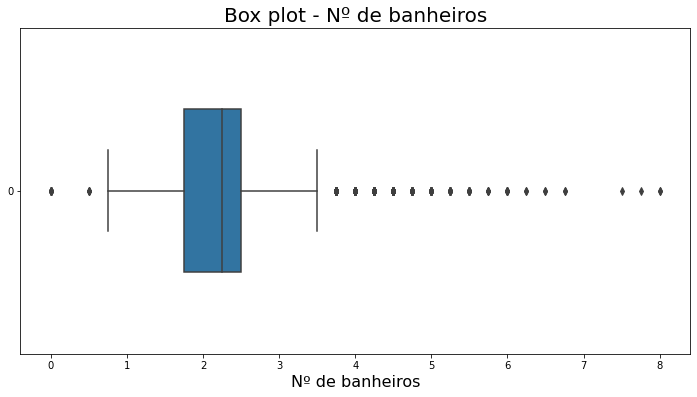

In [ ]:
ax_banheiros = sns.boxplot(data= dados['bathrooms'], orient='h', width=0.5)
ax_banheiros.figure.set_size_inches(12, 6)
ax_banheiros.set_title('Box plot - Nº de banheiros', fontsize=20)
ax_banheiros.set_xlabel('Nº de banheiros', fontsize=16)
ax_banheiros

<Axes: title={'center': 'Box plot - Nº de quartos com vista'}, xlabel='Nº de quartos com vista'>

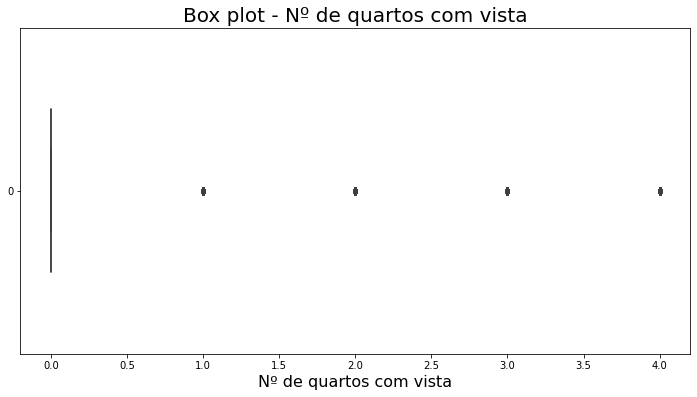

In [ ]:
ax_vista = sns.boxplot(data= dados['view'], orient='h', width=0.5)
ax_vista.figure.set_size_inches(12, 6)
ax_vista.set_title('Box plot - Nº de quartos com vista', fontsize=20)
ax_vista.set_xlabel('Nº de quartos com vista', fontsize=16)
ax_vista

6.2.2 - SCATTERPLOTS (gráfico de dispersão), contendo preço no eixo Y e a variável correlacionada no eixo X.

<Axes: title={'center': 'Preço vs Tamanho do imóvel'}, xlabel='Tamanho do imóvel', ylabel='Preço'>

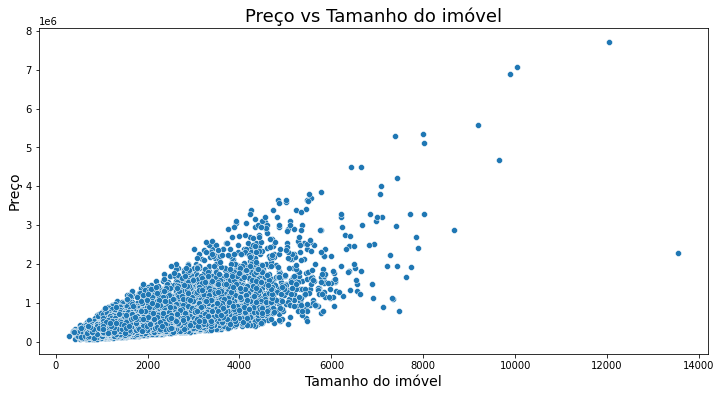

In [ ]:
ax = sns.scatterplot(x=dados['sqft_living'], y=dados['price'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço vs Tamanho do imóvel', fontsize=18)
ax.set_xlabel('Tamanho do imóvel', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

<Axes: title={'center': 'Preço vs Nota do imóvel'}, xlabel='Nota do imóvel', ylabel='Preço'>

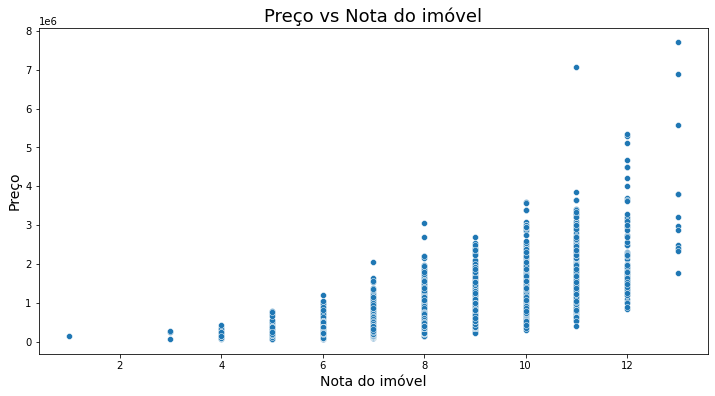

In [ ]:
ax = sns.scatterplot(x=dados['grade'], y=dados['price'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço vs Nota do imóvel', fontsize=18)
ax.set_xlabel('Nota do imóvel', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

<Axes: title={'center': 'Preço vs Tamanho da casa acima do solo'}, xlabel='Tamanho da casa acima do solo', ylabel='Preço'>

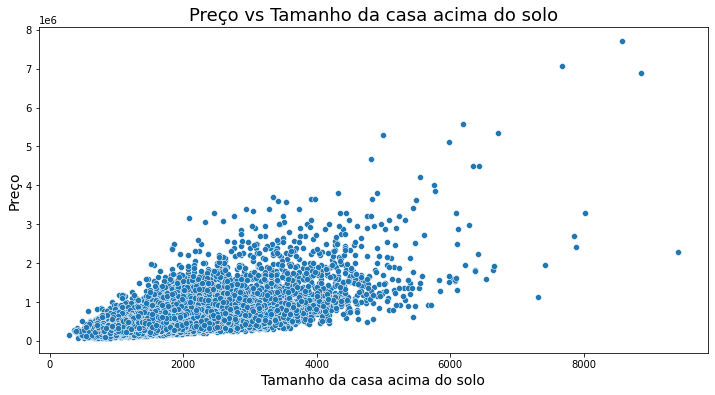

In [ ]:
ax = sns.scatterplot(x=dados['sqft_above'], y=dados['price'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço vs Tamanho da casa acima do solo', fontsize=18)
ax.set_xlabel('Tamanho da casa acima do solo', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

<Axes: title={'center': 'Preço vs Nº de banheiros'}, xlabel='Nº de banheiros', ylabel='Preço'>

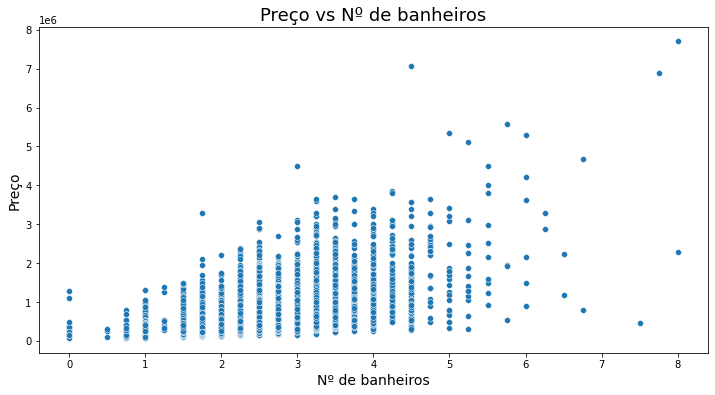

In [ ]:
ax = sns.scatterplot(x=dados['bathrooms'], y=dados['price'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço vs Nº de banheiros', fontsize=18)
ax.set_xlabel('Nº de banheiros', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

<Axes: title={'center': 'Preço vs Nº de quartos com vista'}, xlabel='Nº de quartos com vista', ylabel='Preço'>

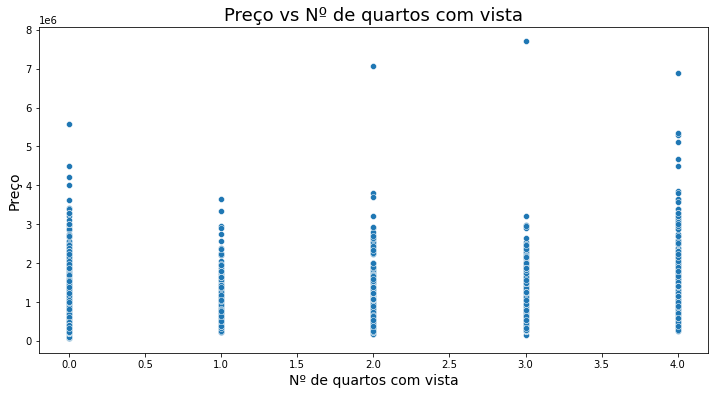

In [ ]:
ax = sns.scatterplot(x=dados['view'], y=dados['price'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço vs Nº de quartos com vista', fontsize=18)
ax.set_xlabel('Nº de quartos com vista', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

6.2.3 - Regressão linear simples para cada uma das top 5 variáveis mais correlacionadas com o preço

In [ ]:
regressao_tamanho_imovel = sm.OLS(dados['price'], sm.add_constant(dados['sqft_living'])).fit()
print(regressao_tamanho_imovel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:03:27   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

In [ ]:
regressao_nota_imovel = sm.OLS(dados['price'], sm.add_constant(dados['grade'])).fit()
print(regressao_nota_imovel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:03:39   Log-Likelihood:            -3.0123e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.056e+06   1.23e+04    -86.166      0.0

In [ ]:
regressao_tamanho_acima_solo = sm.OLS(dados['price'], sm.add_constant(dados['sqft_above'])).fit()
print(regressao_tamanho_acima_solo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:03:52   Log-Likelihood:            -3.0267e+05
No. Observations:               21613   AIC:                         6.053e+05
Df Residuals:                   21611   BIC:                         6.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.995e+04   4729.812     12.676      0.0

In [ ]:
regressao_banheiros = sm.OLS(dados['price'], sm.add_constant(dados['bathrooms'])).fit()
print(regressao_banheiros.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:04:05   Log-Likelihood:            -3.0412e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04   6210.669      1.724      0.0

In [ ]:
regressao_vista = sm.OLS(dados['price'], sm.add_constant(dados['view'])).fit()
print(regressao_vista.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4050.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:04:19   Log-Likelihood:            -3.0575e+05
No. Observations:               21613   AIC:                         6.115e+05
Df Residuals:                   21611   BIC:                         6.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.955e+05   2396.476    206.759      0.0

INTERPRETAÇÃO

Analisando o Termo do coeficiente, é possível constatar que:
- se o tamanho do imóvel aumenta em 1 unidade, então o preço do imóvel aumenta em 280.6236;
- se a nota do imóvel aumenta em 1 unidade, então o preço do imóvel aumenta em 2.085e+05;
- se o tamanho do imóvel acima do solo aumenta em 1 unidade, então o preço do imóvel aumenta em 268.4732;
- se o número de banheiros aumenta em 1 unidade, então o preço do imóvel aumenta em 2.503e+05;
- se o número de quartos com vista aumenta em 1 unidade, então o preço do imóvel aumenta em  1.903e+05;

Analisando o R², é possível constatar que o preço do imóvel é explicado em:
- 49,3% pelo tamanho do imóvel, desconsiderando as demais variáveis;
- 44,5% pela nota do imóvel, desconsiderando as demais variáveis;
- 36,7% pelo tamanho do imóvel acima do solo, desconsiderando as demais variáveis;
- 27.6% pelo número de banheiros, desconsiderando as demais variáveis;
- 15.7% pelo número de quartos com vista, desconsiderando as demais variáveis.

Por fim, apesar de existir uma boa correlação de algumas variáveis com o preço do imóvel, observa-se valores baixos de R², não sendo muito significativo. Uma possível explicação para esse fato pode ser o fato da análise da variação do preço do imóvel ter sido realizada com relação à apenas uma variável independente, sendo que, provavelmente, o preço do imóvel seja influenciado por diversas variáveis em conjunto.

# 7. <font color=purple size=5>Challenge Modelos Regressivos - **Aleika e Nathália**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importando o dataset**

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/WoMakersCode/Desafios/desafio_01_preco_imoveis-230209-164627.csv")

**Visualizando as primeiras linhas**

In [ ]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


**Verificando o tipo dos dados e a existência de dados nulos**

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Convertendo a variável 'date' em uma variável numérica, utilizando um método como a contagem de dias a partir de uma data de referência (1970-01-01).**

In [ ]:
dados['date']=pd.to_datetime(dados['date'])
dados['date']= (dados['date'] - dt.datetime(1970,1,1)).dt.total_seconds()
dados['date'].head()

0    1.413158e+09
1    1.418083e+09
2    1.424822e+09
3    1.418083e+09
4    1.424218e+09
Name: date, dtype: float64

**Gerando algumas estatísticas desritivas para cada variável**

In [ ]:
dados.describe().round(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,1.414557e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21
std,2.876566e+09,9.767348e+06,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14
min,1.000102e+06,1.398989e+09,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52
25%,2.123049e+09,1.405987e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33
50%,3.904930e+09,1.413418e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23
75%,7.308900e+09,1.424131e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12
max,9.900000e+09,1.432685e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32


## **Comportamento da Variável Dependente (preço)**

**Plotando o gráfico do tipo boxplot**

<Axes: title={'center': 'Preço dos imóveis'}, xlabel='Preço'>

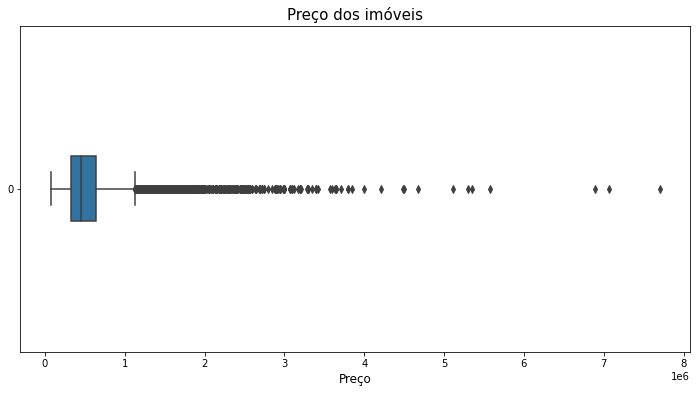

In [ ]:
ax = sns.boxplot(data=dados['price'], orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos imóveis', fontsize=15)
ax.set_xlabel('Preço', fontsize=12)
ax

**Plotando o histograma**

<ipython-input-13-c98038930372>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['price'])


Text(0, 0.5, 'Densidade')

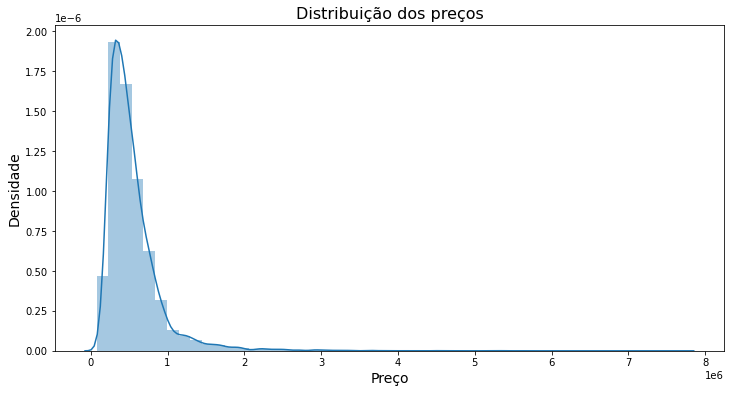

In [ ]:
ax = sns.distplot(dados['price'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição dos preços', fontsize=16)
ax.set_xlabel('Preço', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)

### **Remover outliers utilizando os percentis**

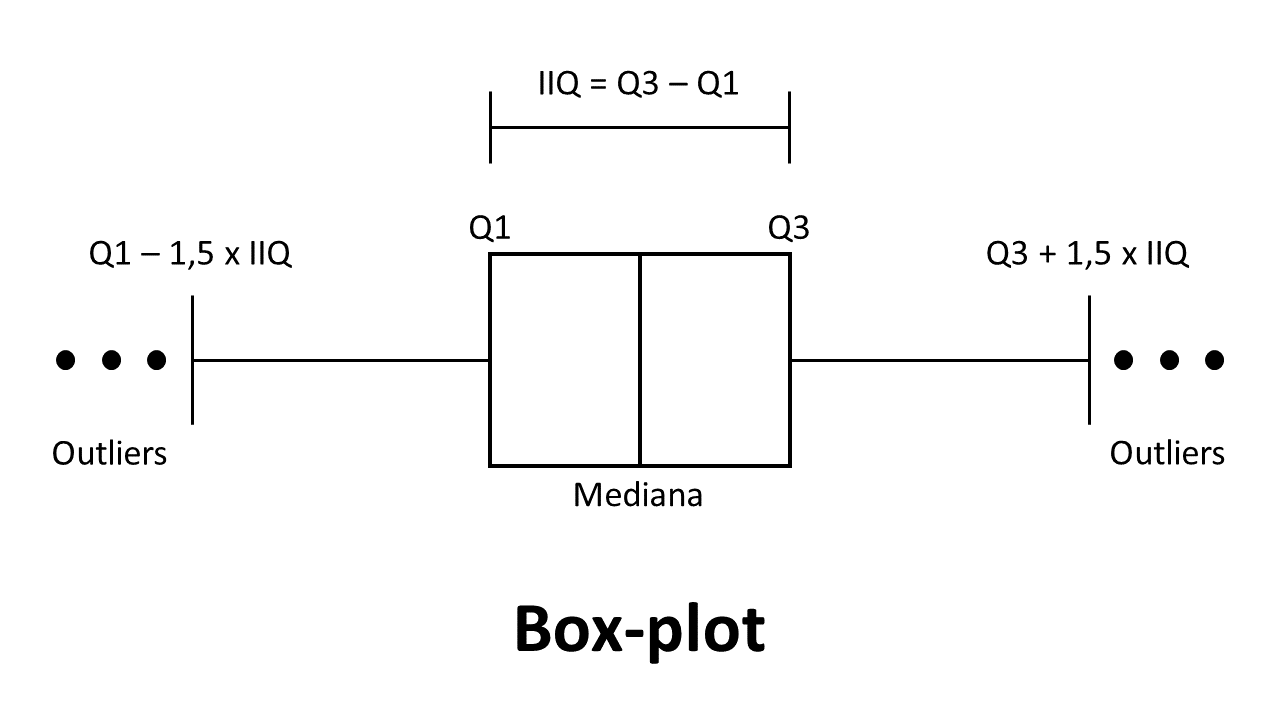

**Código para remoção dos outliers da variável preço (price)**

In [ ]:
cols = ['price'] 

Q1 = dados[cols].quantile(0.25)
Q3 = dados[cols].quantile(0.75)
IQR = Q3 - Q1

dados = dados[~((dados[cols] < (Q1 - 1.5 * IQR)) | (dados[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

**Resultado da remoção dos outliers**

<Axes: title={'center': 'Preço dos imóveis'}, xlabel='Preço'>

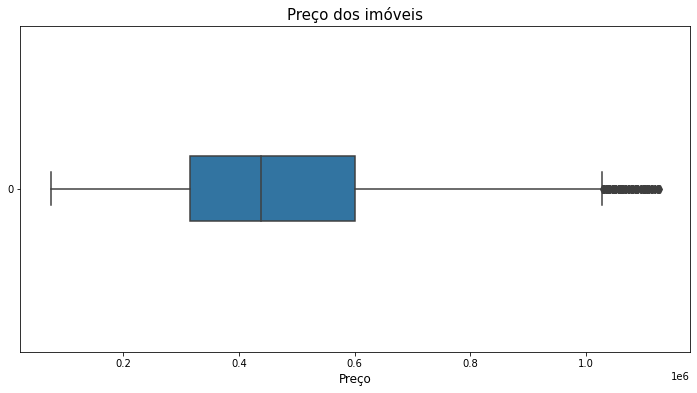

In [ ]:
ax = sns.boxplot(data=dados['price'], orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos imóveis', fontsize=15)
ax.set_xlabel('Preço', fontsize=12)
ax

<ipython-input-16-c98038930372>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['price'])


Text(0, 0.5, 'Densidade')

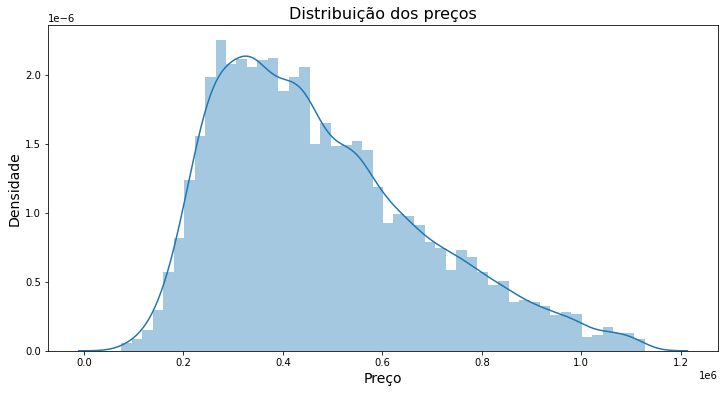

In [ ]:
ax = sns.distplot(dados['price'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição dos preços', fontsize=16)
ax.set_xlabel('Preço', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)

## **Analisando a relação entre as variáveis mais correlacionadas**


**Verificando quais variáveis possuem maior correlação com o preço**

In [ ]:
dados.corr().round(4)['price'].sort_values(ascending=False) 

price            1.0000
grade            0.6312
sqft_living      0.6223
sqft_above       0.5305
bathrooms        0.4559
lat              0.4308
bedrooms         0.2970
floors           0.2740
view             0.2383
sqft_basement    0.2357
sqft_lot         0.0939
yr_renovated     0.0836
long             0.0709
yr_built         0.0611
waterfront       0.0514
condition        0.0383
id               0.0104
date            -0.0096
zipcode         -0.0185
Name: price, dtype: float64

**Analisando a correlação entre as variáveis de maneira visual**

<Axes: title={'center': 'Gráfico de calor para análise da correlação entre as variáveis'}>

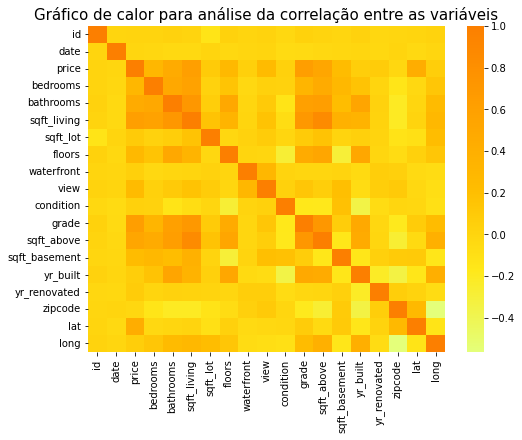

In [ ]:
ax = sns.heatmap(dados.corr(),cmap='Wistia')
ax.figure.set_size_inches(8,6)
ax.set_title('Gráfico de calor para análise da correlação entre as variáveis', fontsize=15)
ax

Observações:

**- Variáveis mais correlacionadas:**
 - sqft_living     
 - grade
 - sqft_above
 - bathrooms
 - view

**- Variáveis menos correlacionadas:**
  - condition
  - long
  - date
  - id (essa variável é utililizada apenas como um identificador)
  - zipcode

**Top 10 das variáveis mais correlacionadas com o preço: Verificando a relação entre elas**

In [ ]:
dados[['sqft_living','grade','sqft_above', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors']].corr()

,sqft_living,grade,sqft_above,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors
sqft_living,1.000000,0.705620,0.853561,0.716684,0.168774,0.376601,0.584609,0.011846,0.001844,0.340731
grade,0.705620,1.000000,0.710093,0.614698,0.132704,0.074052,0.322541,0.086053,-0.013252,0.457134
sqft_above,0.853561,0.710093,1.000000,0.638181,0.067272,-0.161184,0.463458,-0.043581,-0.005489,0.528806
bathrooms,0.716684,0.614698,0.638181,1.000000,0.096833,0.222877,0.493044,-0.007974,-0.003651,0.500904
view,0.168774,0.132704,0.067272,0.096833,1.000000,0.200095,0.038385,-0.027087,0.294325,-0.012535
sqft_basement,0.376601,0.074052,-0.161184,0.222877,0.200095,1.000000,0.283360,0.099932,0.013254,-0.294815
bedrooms,0.584609,0.322541,0.463458,0.493044,0.038385,0.283360,1.000000,-0.027847,-0.030550,0.153511
lat,0.011846,0.086053,-0.043581,-0.007974,-0.027087,0.099932,-0.027847,1.000000,-0.045920,0.036894
waterfront,0.001844,-0.013252,-0.005489,-0.003651,0.294325,0.013254,-0.030550,-0.045920,1.000000,-0.001733
floors,0.340731,0.457134,0.528806,0.500904,-0.012535,-0.294815,0.153511,0.036894,-0.001733,1.000000


**Removendo variáveis mais correlaciondadas entre si**

As variáveis 'sqft_living','grade','sqft_above' e 'bathrooms' possuem uma alta correlação entre elas e esse comportamento deve ser evitado na regressão de modelos. Por isso, dentre essas 4 quatro variáveis, será selecionadas apenas 'sqft_living'.

In [ ]:
dados[['sqft_living', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors']].describe()

,sqft_living,view,sqft_basement,bedrooms,lat,waterfront,floors
count,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,1975.558167,0.172668,267.227195,3.329750,47.556888,0.002980,1.476035
std,774.833460,0.640950,409.031661,0.912885,0.141038,0.054513,0.537033
min,290.000000,0.000000,0.000000,0.000000,47.155900,0.000000,1.000000
25%,1400.000000,0.000000,0.000000,3.000000,47.460400,0.000000,1.000000
50%,1860.000000,0.000000,0.000000,3.000000,47.567000,0.000000,1.000000
75%,2431.000000,0.000000,510.000000,4.000000,47.679800,0.000000,2.000000
max,7480.000000,4.000000,2720.000000,33.000000,47.777600,1.000000,3.500000


**Analisando o tamanho da casa (sqft_living)**

<Axes: title={'center': 'Boxplot do tamanho da casa'}, xlabel='Tamanho da casa'>

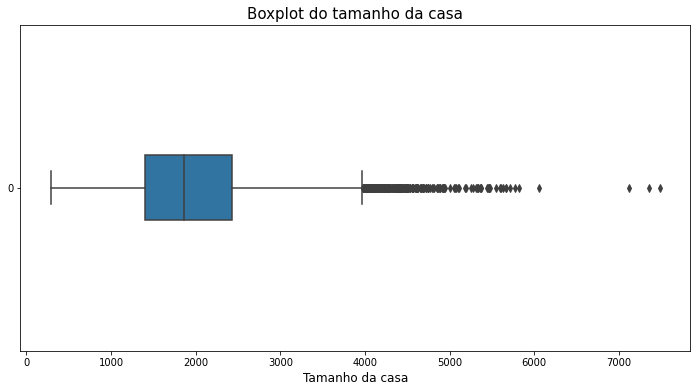

In [ ]:
ax = sns.boxplot(data=dados['sqft_living'], orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot do tamanho da casa', fontsize=15)
ax.set_xlabel('Tamanho da casa', fontsize=12)
ax

**Removendo os outliers da variável 'sqft_living'**

In [ ]:
cols = ['sqft_living'] 

Q1 = dados[cols].quantile(0.25)
Q3 = dados[cols].quantile(0.75)
IQR = Q3 - Q1

dados = dados[~((dados[cols] < (Q1 - 1.5 * IQR)) | (dados[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

**Resultado da remoção dos outliers**

<Axes: title={'center': 'Boxplot tamanho da casa'}, xlabel='Tamanho'>

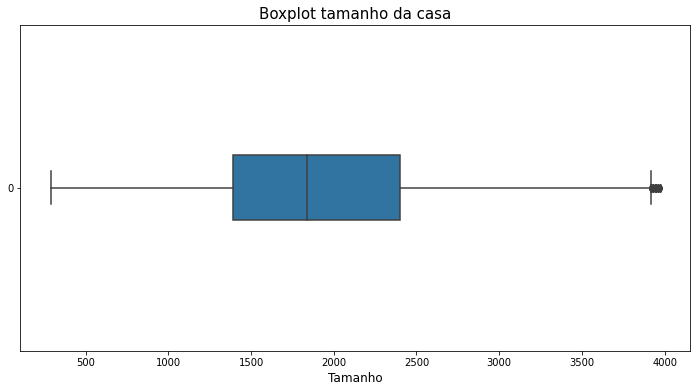

In [ ]:
ax = sns.boxplot(data=dados['sqft_living'], orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot tamanho da casa', fontsize=15)
ax.set_xlabel('Tamanho', fontsize=12)
ax

**Analisando a variável de tamanho do porão (sqft_basement)**

<Axes: title={'center': 'Boxplot do tamanho do porão'}, xlabel='Tamanho do porão'>

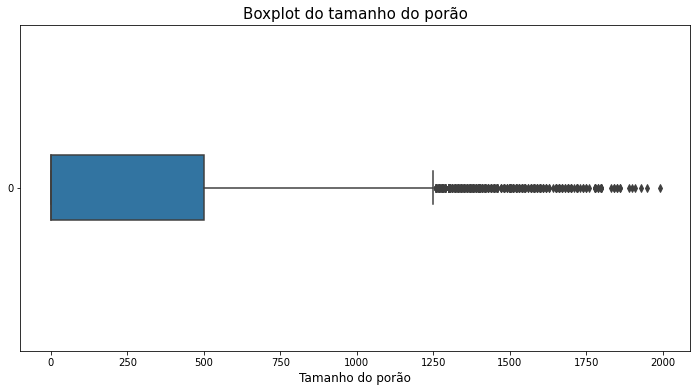

In [ ]:
ax = sns.boxplot(data=dados['sqft_basement'], orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot do tamanho do porão', fontsize=15)
ax.set_xlabel('Tamanho do porão', fontsize=12)
ax

**Removendo os outliers da variável 'sqft_basement'**

In [ ]:
cols = ['sqft_basement'] 

Q1 = dados[cols].quantile(0.25)
Q3 = dados[cols].quantile(0.75)
IQR = Q3 - Q1

dados = dados[~((dados[cols] < (Q1 - 1.5 * IQR)) | (dados[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

**Resultado da remoção dos outliers**

<Axes: title={'center': 'Boxplot do tamanho do porão'}, xlabel='Tamanho do porão'>

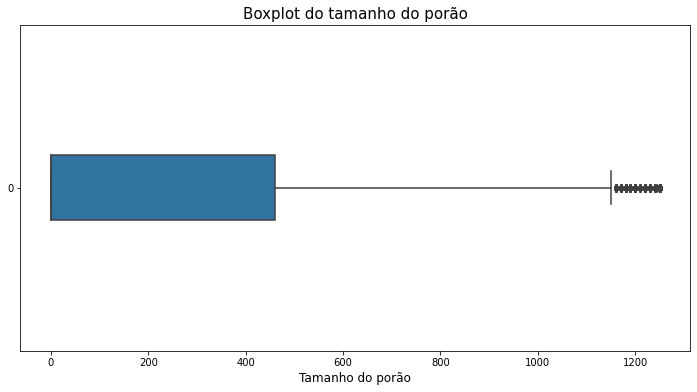

In [ ]:
ax = sns.boxplot(data=dados['sqft_basement'], orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot do tamanho do porão', fontsize=15)
ax.set_xlabel('Tamanho do porão', fontsize=12)
ax

## **Modelo 1**

**Considerando análise das variáveis explicativas mais dependentes e removendo as que possuem altas correlações entre si.**

Veja abaixo que as 4 variáveis que possuem maior correlação ('sqft_living','grade','sqft_above', 'bathrooms') com o preço, também possuem uma correlação alta entre si. Como 'sqft_living' tem maior correlação com o preço, ela será mantida e as outras 3 não serão utilizadas para a regressão, pois deve-se evitar utilizar variáveis explicativas com altas correlações entre si.

Logo, as variáveis que serão utilizadas para a regressão são:
- 'sqft_living'
- 'view'
- 'sqft_basement'
- 'bedrooms'
- 'lat'
- 'waterfront'
- 'floors' 

**Dividindo o dataset em um conjunto de testes e de treino**

In [ ]:
y = dados['price']
X = dados[['sqft_living', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Inicializando o modelo**

In [ ]:
modelo_1 = LinearRegression()

**Treinando o modelo**

In [ ]:
modelo_1.fit(X_train, y_train)

LinearRegression()

**Calculando o coeficiente de determinação (R²) do modelo estimado com os dados de treino**

O R² mede o quanto da variação da variável dependente é explicada pelo modelo estimado.

É uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.



In [ ]:
modelo_1.score(X_train, y_train).round(4)

0.5775

**Coeficiente de determinação (R²) da previsão para os dados de teste**

In [ ]:
#Realiza a previsão com os dados de teste
y_previsto = modelo_1.predict(X_test)

#Calula a métrica
metrics.r2_score(y_test, y_previsto).round(4)

0.5858

**Tabela de coeficientes do modelo de regressão**

In [ ]:
index = ['Intercepto','sqft_living', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront','floors']
pd.DataFrame(data=np.append(modelo_1.intercept_, modelo_1.coef_), index=index, columns=['Parâmetros']).T

,Intercepto,sqft_living,view,sqft_basement,bedrooms,lat,waterfront,floors
Parâmetros,-2.943383e+07,175.013598,47410.678427,-12.613705,-14293.195822,622078.025766,96261.395153,16404.170265


**Gráfico de dispersão entre valor estimado e valor real para o modelo 1**

<Axes: title={'center': 'Previsão X Real - Modelo 1'}, xlabel='Preço dos imóveis - Previsão', ylabel='Preço dos imóveis - Real'>

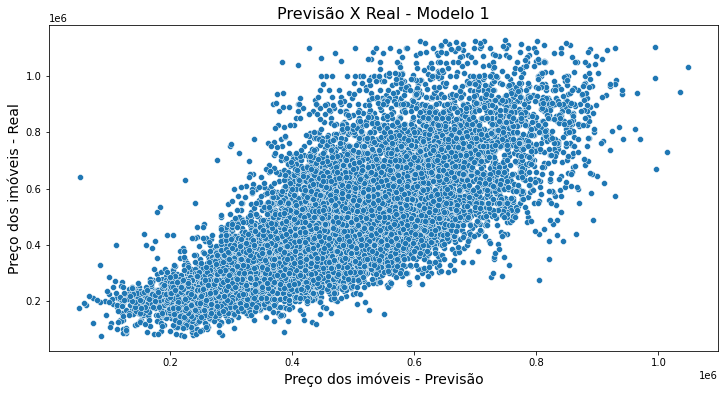

In [ ]:
y_previsto_train = modelo_1.predict(X_train)

ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.set_title('Previsão X Real - Modelo 1', fontsize=16)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Preço dos imóveis - Previsão',fontsize=14)
ax.set_ylabel('Preço dos imóveis - Real',fontsize=14)
ax

**Gráfico de dispersão entre valor estimado e resíduos do modelo 1**

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço dos imóveis - Previsão', ylabel='Preço dos imóveis - Real'>

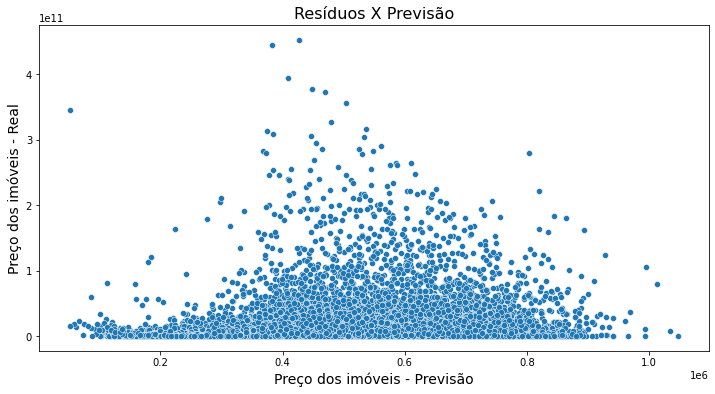

In [ ]:
residuos = y_train - y_previsto_train

ax = sns.scatterplot(x=y_previsto_train, y=residuos**2)
ax.set_title('Resíduos X Previsão', fontsize=16)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Preço dos imóveis - Previsão',fontsize=14)
ax.set_ylabel('Preço dos imóveis - Real',fontsize=14)
ax

**Observação:** A visualização indica que a variância dos erros não é constante.

**Distribuição de frequência dos resíduos para o modelo 1**

<ipython-input-35-e7c5bc646e25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuos)


<Axes: title={'center': 'Distribuição de frequência dos resíduos do modelo 1'}, xlabel='Litros', ylabel='Density'>

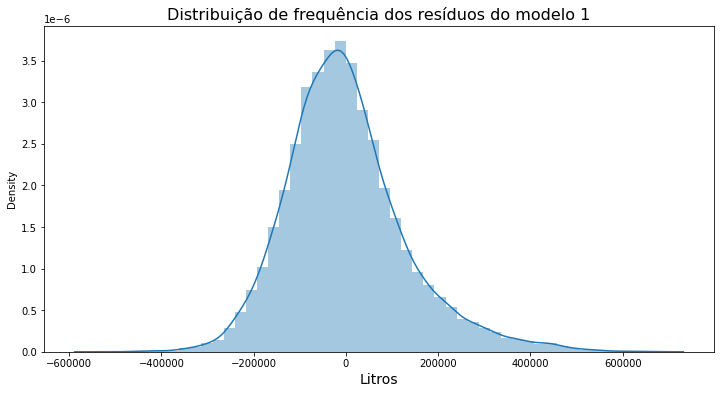

In [ ]:
ax = sns.distplot(residuos)
ax.set_title('Distribuição de frequência dos resíduos do modelo 1', fontsize=16)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Litros',fontsize=14)
ax

## **Modelo 2**

**Removendo a variável:**

- id: essa variável é apenas um identificador para o imóvel, não influencia no preço

In [ ]:
y_2 = dados['price']
X_2 = dados.drop(['price', 'id'], axis=1)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=101)

**Inicializando o modelo**

In [ ]:
modelo_2 = LinearRegression()

**Treinando o modelo**

In [ ]:
modelo_2.fit(X_train_2, y_train_2)

LinearRegression()

**Coeficiente de determinação (R²) do modelo estimado com os dados de treino**

O R² mede o quanto da variação da variável dependente é explicada pelo modelo estimado.

É uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.



In [ ]:
modelo_2.score(X_train_2, y_train_2).round(4)

0.6784

**Coeficiente de determinação (R²) da previsão para os dados de teste**

In [ ]:
#Realiaza a previsão do modelo
y_previsto_2 = modelo_2.predict(X_test_2)

In [ ]:
#Calula a métrica
metrics.r2_score(y_test_2, y_previsto_2).round(4)

0.6795

**Tabela com coeficientes de regressão**

In [ ]:
index = ['Intercepto','date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
pd.DataFrame(data=np.append(modelo_2.intercept_, modelo_2.coef_), index=index, columns=['Parâmetros']).T

,Intercepto,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
Parâmetros,-5.254095e+06,0.000984,-11211.770014,23364.890015,65.551851,0.220643,27290.706108,120544.167799,32788.298802,24997.107769,80761.426273,34.681186,30.870665,-1807.060374,10.903077,-238.765641,543713.567478,-36903.962925


**Gráfico de dispersão entre valor estimado e valor real para o modelo 2**

<Axes: title={'center': 'Previsão X Real - Modelo 2'}, xlabel='Preço dos imóveis - Previsão', ylabel='Preço dos imóveis - Real'>

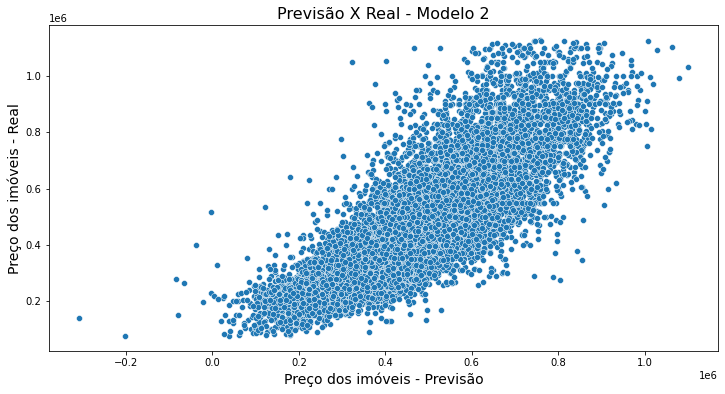

In [ ]:
y_previsto_train_2 = modelo_2.predict(X_train_2)

ax = sns.scatterplot(x=y_previsto_train_2, y=y_train_2)
ax.set_title('Previsão X Real - Modelo 2', fontsize=16)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Preço dos imóveis - Previsão',fontsize=14)
ax.set_ylabel('Preço dos imóveis - Real',fontsize=14)
ax

**Gráfico de dispersão entre valor estimado e resíduos do modelo 2**

<Axes: title={'center': 'Resíduos X Previsão - Modelo 2'}, xlabel='Preço dos imóveis - Previsão', ylabel='Preço dos imóveis - Real'>

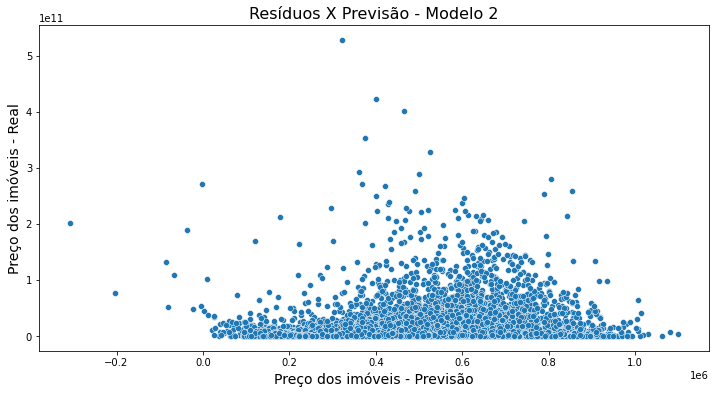

In [ ]:
residuos_2 = y_train_2 - y_previsto_train_2

ax = sns.scatterplot(x=y_previsto_train_2, y=residuos_2**2)
ax.set_title('Resíduos X Previsão - Modelo 2', fontsize=16)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Preço dos imóveis - Previsão',fontsize=14)
ax.set_ylabel('Preço dos imóveis - Real',fontsize=14)
ax

**Observação:** A visualização indica que a variância dos erros não é constante.

**Distribuição de frequência dos resíduos para o modelo 2**

<ipython-input-45-fe3e9302d773>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuos_2)


<Axes: title={'center': 'Distribuição de frequência dos resíduos do modelo 2'}, xlabel='Litros', ylabel='Density'>

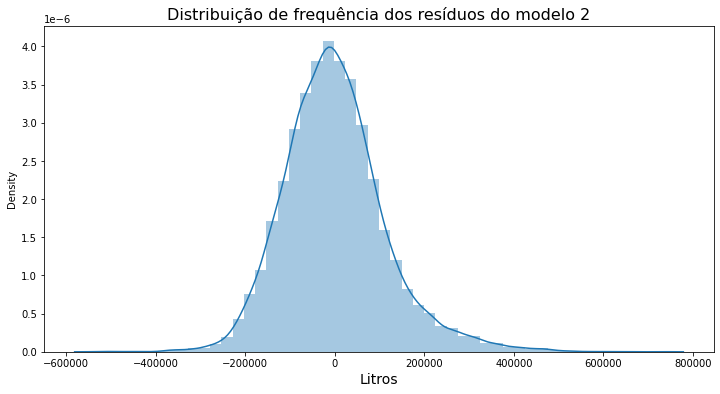

In [ ]:
ax = sns.distplot(residuos_2)
ax.set_title('Distribuição de frequência dos resíduos do modelo 2', fontsize=16)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Litros',fontsize=14)
ax

## **Comparando os modelos**

**Tabela de métricas para o modelo 1**

In [ ]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(4)
REQM = np.sqrt(EQM).round(4)
R2 = metrics.r2_score(y_test, y_previsto).round(4)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,1.654454e+10
REQM,1.286256e+05
R²,5.858000e-01


**Tabela de métricas para o modelo 2**

In [ ]:
EQM = metrics.mean_squared_error(y_test_2, y_previsto_2).round(4)
REQM = np.sqrt(EQM).round(4)
R2 = metrics.r2_score(y_test_2, y_previsto_2).round(4)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,1.280085e+10
REQM,1.131408e+05
R²,6.795000e-01


## **Colocar modelo em produção**


**Salvando o modelo estimado**

In [ ]:
with open("modelo_1_preco_imoveis", "wb") as output:
    pickle.dump(modelo_1, output)
    print('Modelo 1 salvo!')

with open("modelo_2_preco_imoveis", "wb") as output:
    pickle.dump(modelo_2, output)
    print('Modelo 2 salvo!')

Modelo 1 salvo!
Modelo 2 salvo!


**Criando um simulador iterativo**

In [ ]:
#carregando os modelos de regressão linear salvos na etapa anterior
with open("modelo_1_preco_imoveis", "rb") as input:
    modelo1 = pickle.load(input)
    print('Modelo 1 carregado!')

with open("modelo_2_preco_imoveis", "rb") as input:
    modelo2 = pickle.load(input)
    print('Modelo 2 carregado!')

Modelo 1 carregado!
Modelo 2 carregado!


In [ ]:
layout = widgets.Layout(padding='0 10px 0 0')
style = {'description_width': '150px'}

#criando os campos do formulário
tamanho = widgets.FloatText(description="Tamanho do imóvel: ",layout = layout, style=style)
vista = widgets.FloatText(description="Quartos com vista: ",layout = layout, style=style)
porao = widgets.FloatText(description="Tamanho do porão: ",layout = layout,style=style)
quartos = widgets.FloatText(description="Número de quartos: ",layout = layout,style=style)
latitude = widgets.FloatText(description="Latitude do imóvel: ",layout = layout,style=style)
vistaMar = widgets.RadioButtons(
    options=[('Sim', 1), ('Não', 0)],
    description='Vista para o mar?',
    disabled=False,
    layout = layout,
    style=style
)

andares = widgets.FloatText(description="Número de andares: ",layout = layout, style=style)

botao = widgets.Button(description="Simular", button_style='success')

# Posicionando os controles
left = VBox([tamanho, vista, porao, quartos])
right = VBox([latitude, vistaMar, andares])
inputs = HBox([left, right])

# Função de simulação
def simulador(sender):
    entrada=[[
                float(tamanho.value if tamanho.value else 0), 
                float(vista.value if vista.value else 0), 
                float(porao.value if porao.value else 0), 
                float(quartos.value if quartos.value else 0), 
                float(latitude.value if latitude.value else 0), 
                float(vistaMar.value if vistaMar.value else 0),
                float(andares.value if andares.value else 0)
             ]]
    print('\nO preço previsto para o imóvel é de $ {0:.2f}'.format(modelo_1.predict(entrada)[0]))
    
# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador) 

In [ ]:
#Exemplo de entrada
X_test[0:1]

,sqft_living,view,sqft_basement,bedrooms,lat,waterfront,floors
20736,1578,0,0,3,47.3771,0,2.0


In [ ]:
display(inputs, botao)

Button(button_style='success', description='Simular', style=ButtonStyle())


O preço previsto para o imóvel é de $ 304524.32


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
valor_real = y_test[1:2].values[0]
print('O valor real é de $ ',valor_real)
print('Logo, a diferença entre o valor real e o previsto é de $ {0:.2f}'.format(304524.32 - valor_real))

O valor real é de $  276000.0
Logo, a diferença entre o valor real e o previsto é de $ 28524.32


# <font color=purple size=5>**Como a squad se organizou**</font>


- Cada integrante foi desenvolvendo os desafios; 
- Foi feita uma reunião para sortear com qual questão cada integrante iria ficar responsável pela organização para o envio;
- Foi criado um arquivo único para que cada uma fosse inserindo a questão que ficou responsável para ser enviada no final.
- Reunião de acompanhamento da resolução dos desafios patra discutir dúvidas e como foi feita o desafio.


#  **<font color=purple size=5>As facilidades e dificuldades encontradas no desenvolvimento do desafio.</font>**

1. **<font color=purple size=4>Facilidades</font>**

  - Comunicação e organização entre a equipe
  - Material didático da Alura 

2. **<font color=purple size=4>Dificuldades</font>**

  - Encontrar um horário que todas pudessem se reunir com mais frequência.
  - Dúvidas teóricas sobre os assuntos de estatística (em especial sobre a formulação dos testes de hipóteses)
  - Conciliar as aulas do curso com o desenvolvimento dos desafios.
  - As aulas serem gravadas e não ter discussões durante a exposição do conteúdo.

#                   <font color=purple size=6 >**Obrigada!**</font>